In [3]:
import os
import math
import yfinance as yf, pandas as pd, matplotlib.pyplot as plt

In [4]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [8]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-30 00:00:00+00:00,29245.515625,29952.029297,29114.021484,29268.806641,14652199272,0.0,0.0
2023-05-01 00:00:00+00:00,29227.103516,29329.935547,27680.792969,28091.568359,18655599976,0.0,0.0
2023-05-02 00:00:00+00:00,28087.175781,28881.298828,27924.123047,28680.537109,16432924527,0.0,0.0


In [9]:
btc.index = pd.to_datetime(btc.index)

In [10]:
btc.index = btc.index.tz_localize(None) 

In [11]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-30,29245.515625,29952.029297,29114.021484,29268.806641,14652199272,0.0,0.0
2023-05-01,29227.103516,29329.935547,27680.792969,28091.568359,18655599976,0.0,0.0
2023-05-02,28087.175781,28881.298828,27924.123047,28680.537109,16432924527,0.0,0.0


In [12]:
del btc["Dividends"]
del btc["Stock Splits"]

In [13]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

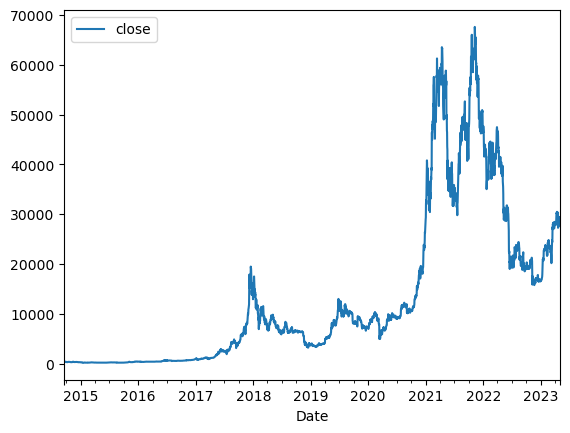

In [14]:
btc.plot.line(y="close", use_index=True)

In [15]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [16]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2023-04-30,0.133333,-0.066486,0.083333
2023-05-01,0.133333,-0.066486,0.083333
2023-05-02,0.133333,-0.066486,0.083333
2023-05-03,0.100000,-0.033266,0.050000


In [17]:
btc = btc.merge(wiki, left_index=True, right_index=True)

In [18]:
btc["tomorrow"] = btc["close"].shift(-1)

In [19]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [20]:
btc["target"].value_counts()

1    1677
0    1475
Name: target, dtype: int64

In [32]:
# Train test split

to_row =int(len(btc) * 0.9)

training_data = btc[0:to_row]['tomorrow']
testing_data = btc[to_row:]['tomorrow']

to_row
training_data
testing_data

2022-06-23    21231.656250
2022-06-24    21502.337891
2022-06-25    21027.294922
2022-06-26    20735.478516
2022-06-27    20280.634766
                  ...     
2023-04-30    28091.568359
2023-05-01    28680.537109
2023-05-02    29006.308594
2023-05-03    28899.744141
2023-05-04             NaN
Name: tomorrow, Length: 316, dtype: float64

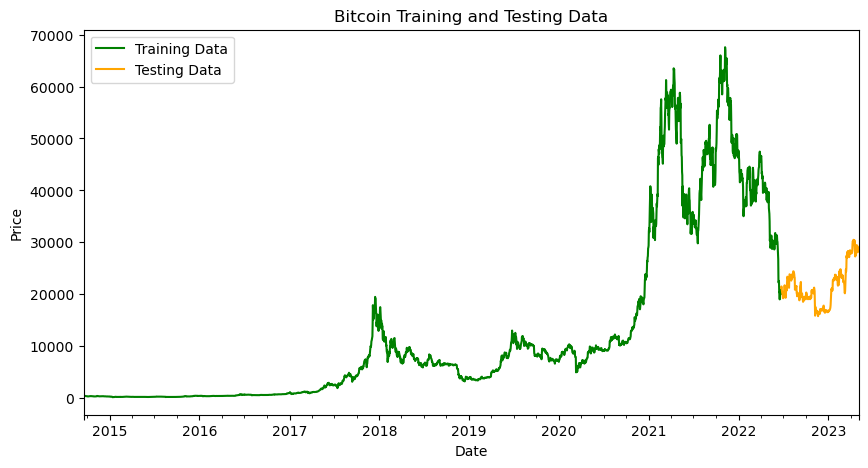

In [35]:
# plotting the training and testing data

fig, ax = plt.subplots(figsize=(10, 5))

# plot training data in green
btc[0:to_row]['tomorrow'].plot(ax=ax, color='green')

# plot testing data in red
btc[to_row:]['tomorrow'].plot(ax=ax, color='orange')

# customize the plot
ax.set_title('Bitcoin Training and Testing Data')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(['Training Data', 'Testing Data'])
plt.show()

In [36]:
prediction = []
n_test_observer = len(testing_data)